In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 图像

In [4]:
img = cv2.imread('data\lena.jpg')

In [5]:
img

array([[[128, 138, 225],
        [127, 137, 224],
        [126, 136, 224],
        ...,
        [126, 145, 236],
        [110, 129, 220],
        [ 86, 104, 197]],

       [[127, 137, 224],
        [127, 137, 224],
        [127, 137, 224],
        ...,
        [130, 150, 235],
        [112, 132, 217],
        [ 83, 102, 189]],

       [[127, 137, 224],
        [127, 137, 224],
        [128, 138, 225],
        ...,
        [127, 148, 230],
        [112, 133, 215],
        [ 85, 105, 190]],

       ...,

       [[ 55,  21,  82],
        [ 54,  20,  81],
        [ 62,  28,  92],
        ...,
        [ 82,  71, 175],
        [ 78,  68, 175],
        [ 74,  65, 175]],

       [[ 55,  18,  80],
        [ 56,  19,  81],
        [ 66,  32,  96],
        ...,
        [ 82,  69, 177],
        [ 80,  71, 181],
        [ 81,  72, 183]],

       [[ 56,  19,  81],
        [ 58,  21,  83],
        [ 68,  34,  98],
        ...,
        [ 81,  68, 176],
        [ 81,  72, 183],
        [ 84,  74, 188]]

In [6]:
#图像显示
cv2.imshow('image', img)
#等待时间，毫秒级，0表示任意键中止
cv2.waitKey(0)
cv2.destroyAllWindows()

~~~python
# CV显示图片
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
~~~

In [7]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [8]:
img.shape

(512, 512, 3)

In [9]:
img = cv2.imread('data\lena.jpg', cv2.IMREAD_GRAYSCALE)
img

array([[163, 162, 161, ..., 170, 154, 130],
       [162, 162, 162, ..., 173, 155, 126],
       [162, 162, 163, ..., 170, 155, 128],
       ...,
       [ 43,  42,  51, ..., 103, 101,  99],
       [ 41,  42,  55, ..., 103, 105, 106],
       [ 42,  44,  57, ..., 102, 106, 109]], dtype=uint8)

In [10]:
cv_show('image', img)

In [11]:
img.shape

(512, 512)

In [12]:
#图像保存
cv2.imwrite('lena_gray.jpg', img)

True

# 视频

In [13]:
vc = cv2.VideoCapture('data\\vtest.avi')

In [14]:
#检查是否打开正确
if vc.isOpened():
    open, frame = vc.read()
else:
    open = False

In [15]:
#视频放映
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        #esc推出
        if cv2.waitKey(50) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

# 截取部分图像数据

In [28]:
img = cv2.imread('data\lena.jpg')
lena = img[0:400, 0:350]
cv_show('lena', lena)

# 颜色通道提取

In [29]:
b, g, r = cv2.split(img)

In [34]:
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
img = cv2.merge((b, g, r))
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
# 只保留R
cur_img = img.copy()
cur_img[:, :, 0] = 0
cur_img[:, :, 1] = 0
cv_show('R', cur_img)

# 边界填充

In [36]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)

replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

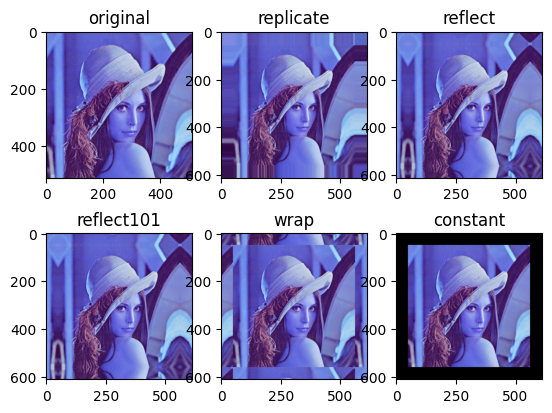

In [37]:
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('reflect101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('constant')
plt.show()

# 数值计算

In [5]:
img_area1 = cv2.imread('data\\aero1.jpg')
img_area3 = cv2.imread('data\\aero3.jpg')
img_area = img_area1 + img_area3
cv_show('img_area', img_area)

In [7]:
cv_show('add_area',cv2.add(img_area1, img_area3))

# 图像融合

In [9]:
res = cv2.addWeighted(img_area1, 0.4, img_area3, 0.6, 1)
cv_show('res', res)

In [10]:
help(cv2.addWeighted)

Help on built-in function addWeighted:

addWeighted(...)
    addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]) -> dst
    .   @brief Calculates the weighted sum of two arrays.
    .   
    .   The function addWeighted calculates the weighted sum of two arrays as follows:
    .   \f[\texttt{dst} (I)= \texttt{saturate} ( \texttt{src1} (I)* \texttt{alpha} +  \texttt{src2} (I)* \texttt{beta} +  \texttt{gamma} )\f]
    .   where I is a multi-dimensional index of array elements. In case of multi-channel arrays, each
    .   channel is processed independently.
    .   The function can be replaced with a matrix expression:
    .   @code{.cpp}
    .       dst = src1*alpha + src2*beta + gamma;
    .   @endcode
    .   @note Saturation is not applied when the output array has the depth CV_32S. You may even get
    .   result of an incorrect sign in the case of overflow.
    .   @param src1 first input array.
    .   @param alpha weight of the first array elements.
    .   @param src2 se

In [11]:
help(cv2.resize)

Help on built-in function resize:

resize(...)
    resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
    .   @brief Resizes an image.
    .   
    .   The function resize resizes the image src down to or up to the specified size. Note that the
    .   initial dst type or size are not taken into account. Instead, the size and type are derived from
    .   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
    .   you may call the function as follows:
    .   @code
    .       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    .       resize(src, dst, dst.size(), 0, 0, interpolation);
    .   @endcode
    .   If you want to decimate the image by factor of 2 in each direction, you can call the function this
    .   way:
    .   @code
    .       // specify fx and fy and let the function compute the destination image size.
    .       resize(src, dst, Size(), 0.5, 0.5, interpolation);
    .   @endcode
